In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Read  price data from csv

In [259]:
df_cobalt=pd.read_csv("data/cobalt 5 year data", header=None,index_col=0, parse_dates=True)
df_mbo=pd.read_csv("data/molybdenum oxide 5 year data", header=None,index_col=0, parse_dates=True)
df_zinc=pd.read_csv("data/zinc 5 year data", header=None,index_col=0, parse_dates=True)
df_tin=pd.read_csv("data/tin 5 year data", header=None,index_col=0, parse_dates=True)
df_nickel=pd.read_csv("data/nickel 5 year data", header=None,index_col=0, parse_dates=True)

# Rename index and column labels

In [260]:
df_cobalt=df_cobalt.rename_axis(['Date']);
df_cobalt=df_cobalt.rename(columns={1:'Cobalt'});

df_mbo=df_mbo.rename_axis(['Date']);
df_mbo=df_mbo.rename(columns={1:"Molybdenum Oxide"});

df_zinc=df_zinc.rename_axis(['Date']);
df_zinc=df_zinc.rename(columns={1:'Zinc'});

df_tin=df_tin.rename_axis(['Date']);
df_tin=df_tin.rename(columns={1:'tin'});

df_nickel=df_nickel.rename_axis(['Date']);
df_nickel=df_nickel.rename(columns={1:'Nickel'});

# Check data

In [261]:
df_cobalt.info()
df_cobalt.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2014-01-20 to 2019-06-15
Data columns (total 1 columns):
Cobalt    113 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


,Cobalt
Date,
2014-01-20,12.925833
2014-02-16,14.260596
2014-03-10,14.093228
2014-04-05,13.825439
2014-04-29,13.691544


In [262]:
df_mbo.info()
df_mbo.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2014-01-10 to 2019-03-19
Data columns (total 1 columns):
Molybdenum Oxide    104 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


,Molybdenum Oxide
Date,
2014-01-10,9.737116
2014-01-22,10.279389
2014-02-24,10.384832
2014-03-18,10.454122
2014-03-30,11.092800


In [263]:
df_zinc.info()
df_zinc.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2014-01-29 to 2019-06-15
Data columns (total 1 columns):
Zinc    118 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


,Zinc
Date,
2014-01-29,0.916207
2014-02-21,0.941982
2014-03-19,0.904491
2014-03-31,0.904491
2014-04-22,0.929596


In [265]:
df_tin.info()
df_tin.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110 entries, 2014-01-20 to 2019-06-11
Data columns (total 1 columns):
tin    110 non-null float64
dtypes: float64(1)
memory usage: 1.7 KB


,tin
Date,
2014-01-20,10.045830
2014-02-06,10.132861
2014-02-21,10.480988
2014-03-08,10.557140
2014-03-30,10.531031


In [266]:
df_nickel.info()
df_nickel.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2014-01-23 to 2019-06-15
Data columns (total 1 columns):
Nickel    128 non-null float64
dtypes: float64(1)
memory usage: 2.0 KB


,Nickel
Date,
2014-01-23,6.502775
2014-02-04,6.337081
2014-02-19,6.521186
2014-03-01,6.705291
2014-03-07,6.990654


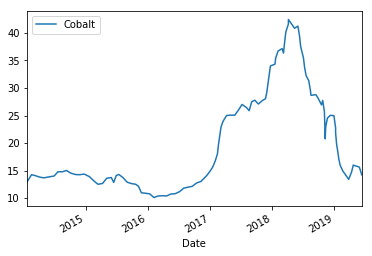

In [267]:
df_cobalt.plot()

# Resample data to daily and merge inner

In [268]:
df_cob=df_cobalt.resample('d').mean().interpolate();
df_mbo=df_mbo.resample('d').mean().interpolate();
df_zinc=df_zinc.resample('d').mean().interpolate();
df_tin=df_tin.resample('d').mean().interpolate();
df_nickel=df_nickel.resample('d').mean().interpolate();

In [269]:
merge1=pd.merge(df_cob,df_mbo,  how='inner', on='Date');
merge2=pd.merge(merge1,df_zinc,  how='inner', on='Date');
merge3=pd.merge(merge2,df_tin, how='inner', on='Date');
merge4=pd.merge(merge3,df_nickel, how='inner', on='Date');

In [270]:
merge4.head()

,Cobalt,Molybdenum Oxide,Zinc,tin,Nickel
Date,,,,,
2014-01-29,13.370754,10.301756,0.916207,10.091905,6.419928
2014-01-30,13.420190,10.304951,0.917328,10.097025,6.406120
2014-01-31,13.469626,10.308146,0.918448,10.102144,6.392312
2014-02-01,13.519061,10.311342,0.919569,10.107264,6.378504
2014-02-02,13.568497,10.314537,0.920690,10.112383,6.364696


# Export Dataframe to csv

In [271]:
merge4.to_csv("flourish_data.csv")